In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# All Activation Functions and their Transfer Derivatives

# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [3]:
def feed_forward(data_in, w0,w1,w2, w3, b):
    '''
    The Feed-forward considers 5 layers including input and output layer.
    
    The output layer/neuron is a regression node.
    
    returns: state of each layer
    '''
    layer0 = data_in
    layer1 = relu(np.dot(layer0, w0))
    layer2 = relu(np.dot(layer1, w1))
    layer3 = relu(np.dot(layer2, w2))
    layer4 = np.dot(layer3, w3) + b

    return layer0, layer1, layer2, layer3, layer4

In [77]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3, b, learning_rate):
    '''
    This backpropogate is only slightly different from a regular classifier
    in ways in which the output layer gradient is calculated.
    
    Since the output layer is not a function of any activation function,
    the delta doesn't need to be multiplied with the transfer derivative of the
    output layer.
    
    The rest is all the same.
    
    returns: weights and bias matrices
    '''
    
    op_delta = layer4 - actual_y
    dh4 = np.dot(layer3.T, op_delta)
    
    l3_error = op_delta.dot(w3.T)
    l3_delta = l3_error * drelu(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * drelu(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * drelu(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    b = b - (learning_rate * np.mean(op_delta))

    
   
    if i%50==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,w3,b

### Working on the Forest Fire Area Prediction

This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

However, the above problem has been solved with considerably low mean absolute deviation.

In [78]:
d = pd.read_csv('forestfires.csv')
d = d.drop(['month', 'day'], axis=1)

# Normalizing all Data Points
d = (d - d.mean()) / (d.max() - d.min())

# Picking all columns other than the last one as X
X = np.array(d.iloc[:,:-1])

# And the last one as Y
Y = np.array(d.iloc[:,-1])

# Need to reshape it to be able to pass through the network
Y =Y.reshape(len(Y), 1)

# Split the data into respective test and train
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2)

## Defining the Network

10 Nodes (Input) -  50 Nodes(Layer1)  - 30 Nodes(Layer2)  - 5 Nodes(Layer3)  - 1 Output Node


In [79]:
w0 = np.random.random((10,50))
w1 = np.random.random((50,30))
w2 = np.random.random((30, 5))
w3 = np.random.random((5,1))
b = np.random.random((1,1))
#print(b)

epochs = 10000

In [80]:
# Initialising variables to track loss vs iterations so we can plot the changes
loss_curve = []
iters = []

### Run the training

In [81]:
for i in tqdm_notebook(range(epochs)):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain, w0,w1,w2,w3,b)
    w0, w1,w2,w3,b = backpropogate(i,layer0, layer1, layer2, layer3, layer4, ytrain, w0,w1,w2,w3, b, 0.001 )
    


 1000 0.04732217317722725

 2000 0.00974335553321983

 3000 0.004662702191223787

 4000 0.003975798238415366

 5000 0.0038829288752404182

 6000 0.003870372944267453

 7000 0.0038686753833366114

 8000 0.0038684458732254037

 9000 0.003868414843475491



### Checking RMSE on Test Data

In [82]:
layer0, layer1, layer2, layer3, layer4 = feed_forward(xtest, w0,w1,w2,w3,b)
loss = np.mean(np.power(layer4-ytest, 2))
loss

0.0015334990984522655

#### Plotting the Loss vs Iter curve

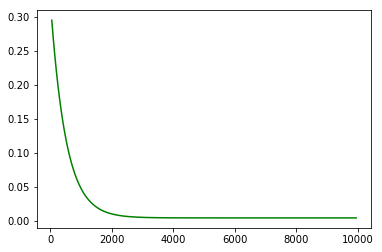

In [83]:
plt.plot(iters, loss_curve, 'g-')